Credit: https://www.kaggle.com/adhok93/eda-with-plotly

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv('../../datasets/movie_metadata.csv')

In [3]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

# What is the average IMDB rating by year?

In [5]:
movies_years = movie[['movie_title', 'title_year']]

In [6]:
score_by_year = movie.groupby(['title_year'])['imdb_score'].mean()

In [7]:
keys = list(score_by_year.keys())
vals = list(score_by_year.values)

keys_df = pd.DataFrame({"year": keys})
vals_df = pd.DataFrame({"score": vals})

score_by_year = pd.concat([keys_df, vals_df], axis=1)

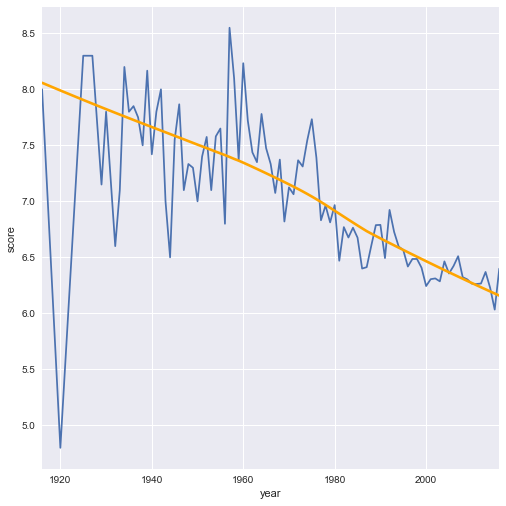

In [8]:
score_grid = sns.FacetGrid(data=score_by_year, size=7)
score_grid.map(sns.tsplot, data=score_by_year.score, 
               time=score_by_year.year)
score_grid.map(sns.regplot, data=score_by_year, x='year', 
               y='score', lowess=True, scatter=False, color='orange')
score_grid.set_axis_labels(x_var='year', y_var='score')

# What are the total number of movies reviewed by year?

In [9]:
years_counts = movie.groupby('title_year').size()

In [10]:
years_number = pd.DataFrame({'count': list(years_counts.values)})
years = pd.DataFrame({'year': list(years_counts.keys())})

years_counts_df = pd.concat([years_number, years], axis=1)

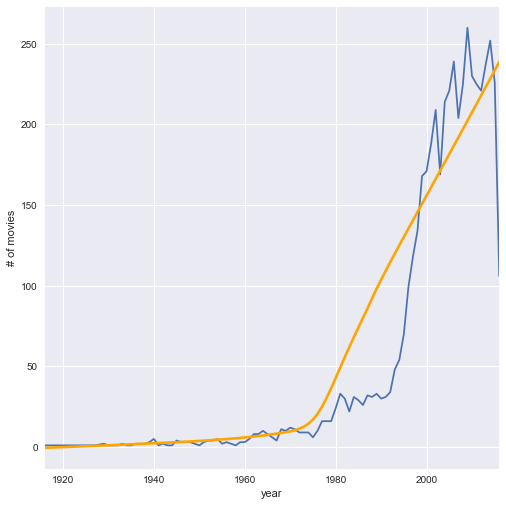

In [11]:
count_grid = sns.FacetGrid(data=years_counts_df, size=7)
count_grid.map(sns.tsplot, data=years_counts, 
               time=years_counts.keys())
count_grid.map(sns.regplot, data=years_counts_df, x='year', 
               y='count', lowess=True, scatter=False, color='orange')
count_grid.set_axis_labels(x_var='year', y_var='# of movies')

# How do the average score change for each type of content rating?

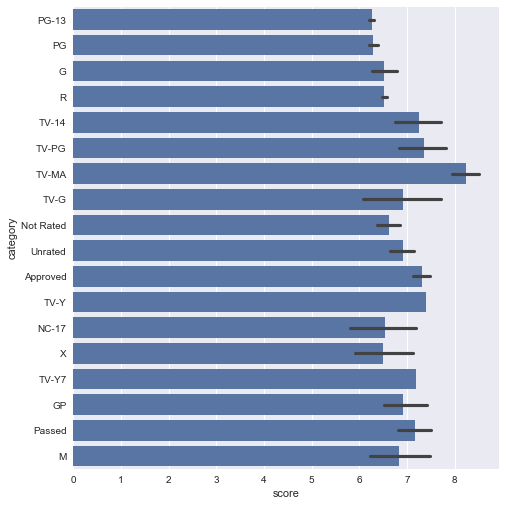

In [12]:
rating_grid = sns.FacetGrid(data=movie, size=7)
rating_grid.map(sns.barplot, data=movie, y='content_rating',
                x='imdb_score')
rating_grid.set_axis_labels(x_var='score', y_var='category')
#rating_grid.set_xticklabels(rotation=90)

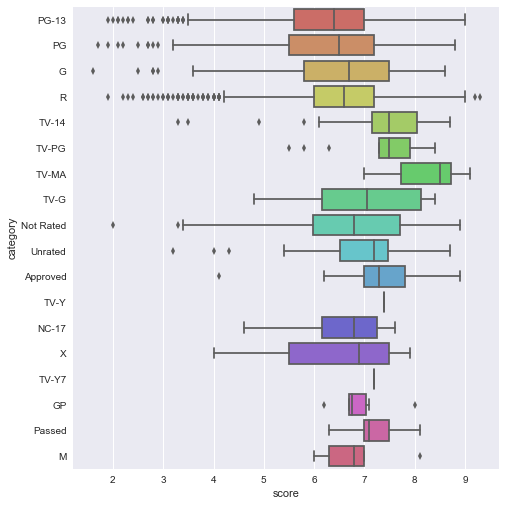

In [13]:
rating_grid = sns.FacetGrid(data=movie, size=7)
rating_grid.map(sns.boxplot, data=movie, y='content_rating',
                x='imdb_score', palette='hls')
rating_grid.set_axis_labels(x_var='score', y_var='category')

# Which director has the highest average IMBD rating?

In [14]:
top_directors = movie[['director_name', 'imdb_score']] \
.groupby('director_name').mean().nlargest(20, columns='imdb_score')

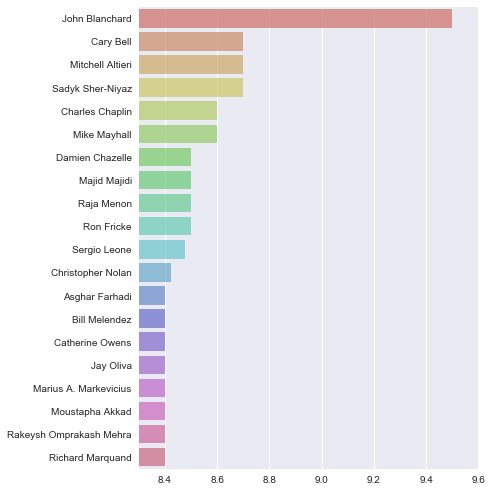

In [42]:
rating_director_grid = sns.FacetGrid(data=top_directors.T, size=7)
rating_director_grid.set(xlim=(8.3, 9.6))
rating_director_grid.map(sns.barplot, data=top_directors.T, 
                         orient='h', alpha=.7, palette='hls')

# Are the number of facebook likes an indicator of the imdb_score?

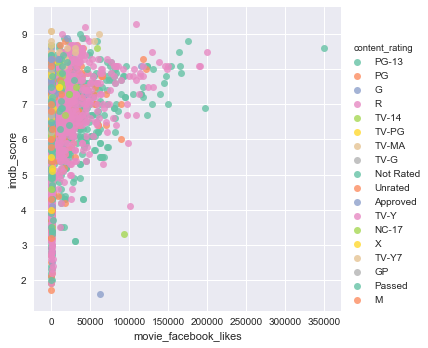

In [16]:
sns.lmplot(data=movie, x='movie_facebook_likes', y='imdb_score',
              hue='content_rating', fit_reg=False, palette='Set2')

In [17]:
# drop entries with no facebook likes
cond = movie.movie_facebook_likes > 0
facebook_likes = movie.where(cond).dropna()

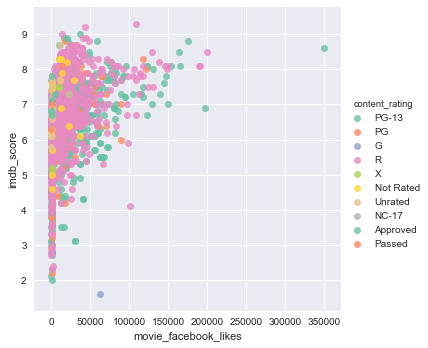

In [18]:
sns.lmplot(data=facebook_likes, x='movie_facebook_likes',
           y='imdb_score', hue='content_rating', fit_reg=False, 
           palette='Set2')

# How are the likes of the total cast related to budget? Do producers spend more on popular actors?

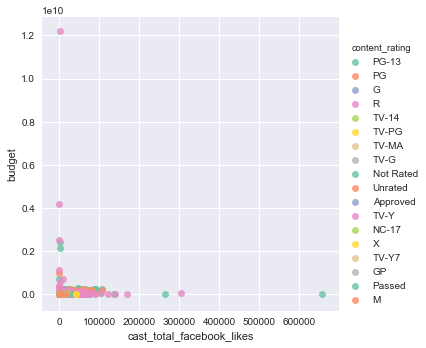

In [19]:
budget = movie[['cast_total_facebook_likes', 'budget', 
    'movie_title', 'content_rating']]
sns.lmplot(data=budget, x='cast_total_facebook_likes',
           y='budget', hue='content_rating', fit_reg=False, 
           palette='Set2')

In [20]:
q1 = movie.budget.quantile(0.25)
q3 = movie.budget.quantile(0.75)
H = 1.5 * q3 - q1
cond = (q1 - H <= budget.budget) & (q3 + H >= budget.budget)

In [21]:
budget_wo_outliers = movie.where(cond).dropna()

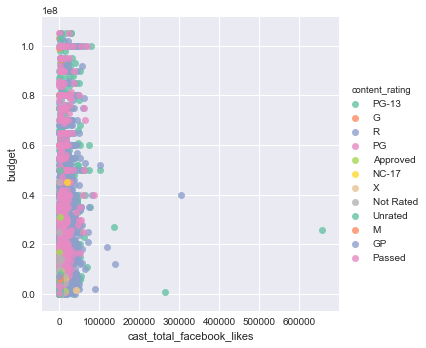

In [22]:
sns.lmplot(data=budget_wo_outliers, x='cast_total_facebook_likes',
           y='budget', hue='content_rating', fit_reg=False, 
           palette='Set2')

# Is the number of likes for a director tied to the IMDB score?

In [23]:
likes_director = movie[['director_facebook_likes', 'imdb_score', 
                        'content_rating', 'movie_title']]

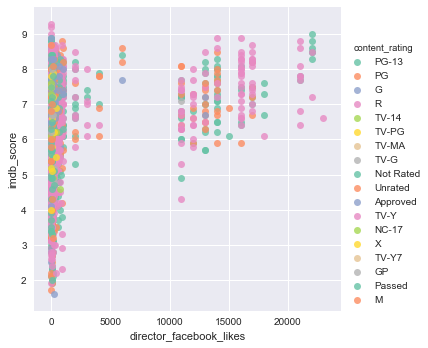

In [24]:
sns.lmplot(data=likes_director, x='director_facebook_likes',
           y='imdb_score', hue='content_rating', fit_reg=False, 
           palette='Set2')

# What are the number of films that have grossed less than their budgets by year?

In [25]:
grossed = movie.copy()
grossed = grossed[['gross', 'budget', 'title_year']]

In [26]:
grossed['diff'] = movie.gross - movie.budget
grossed.dropna(inplace=True)

In [27]:
grossed_less = grossed.where(grossed['diff'] < 0).dropna()

In [28]:
grossed_less_by_year = grossed_less.groupby('title_year').size()

In [29]:
year_df = pd.DataFrame({'year': list(grossed_less_by_year.keys())})
count_df = pd.DataFrame({'count': list(grossed_less_by_year.values)})

grossed_less_by_year_df = pd.concat([year_df, count_df], axis=1)

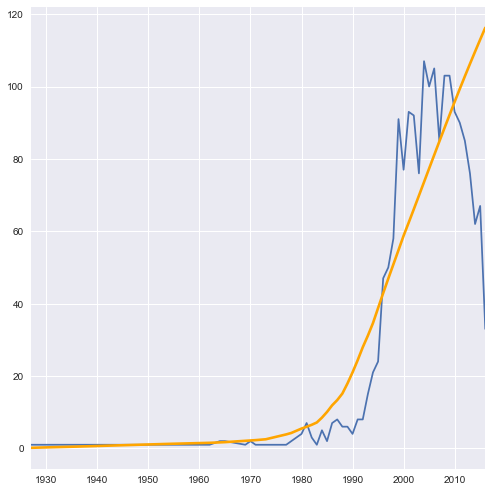

In [30]:
grossed_grid = sns.FacetGrid(data=grossed_less_by_year_df, size=7)
grossed_grid.map(sns.tsplot, data=grossed_less_by_year_df['count'],
                 time=grossed_less_by_year_df.year)
grossed_grid.map(sns.regplot, data=grossed_less_by_year_df,
                 x='year', y='count', scatter=False, lowess=True,
                 color='orange')